In [1]:
import numpy as np
import matplotlib.pyplot as plt

# if you edit the function you need to run these lines again otherwise it won't be updated in this notebook
import importlib, plotting_functions
importlib.reload(plotting_functions) 
from plotting_functions import plot_opinions

In [2]:
# for a in agents:
def one_step(agent, agents):

    selected = np.where(np.abs(agents - agent) <= R)[0]
    update = np.average(agents[selected])
    
    return update

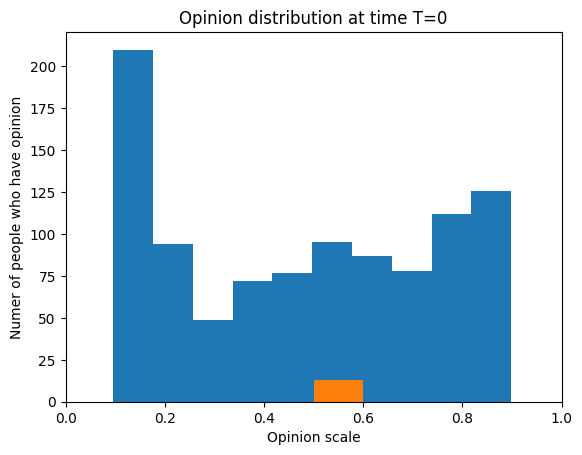

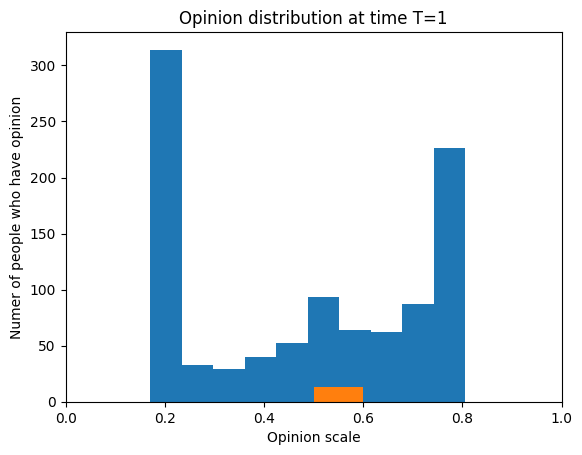

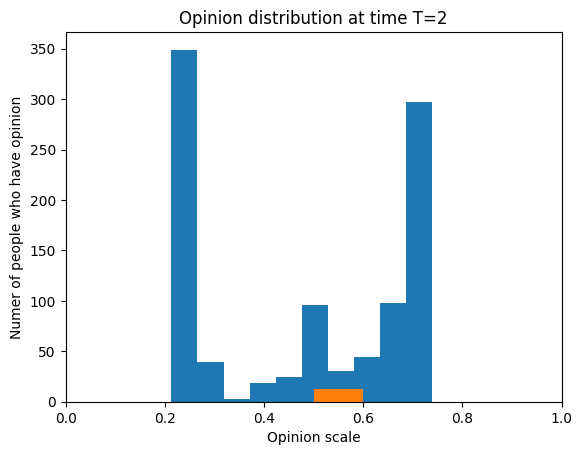

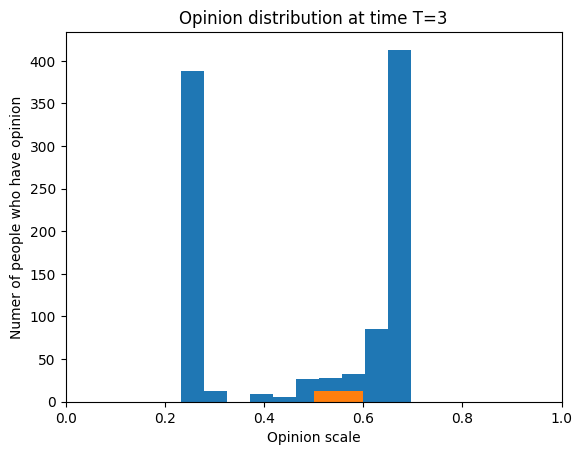

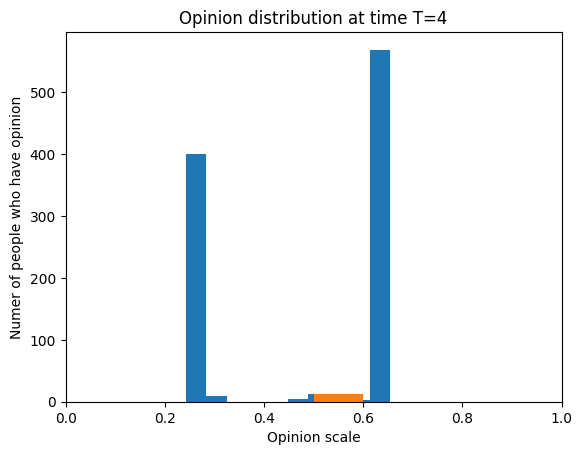

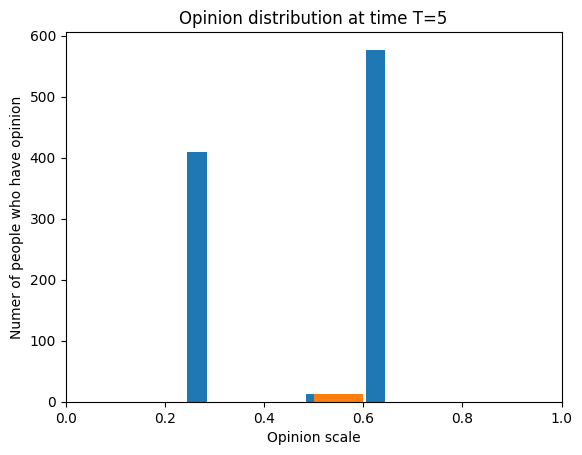

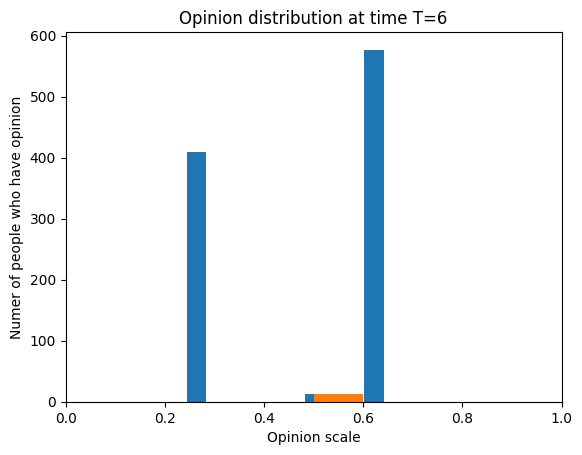

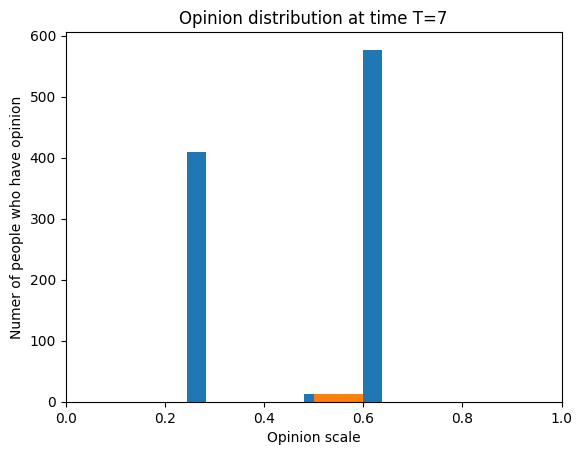

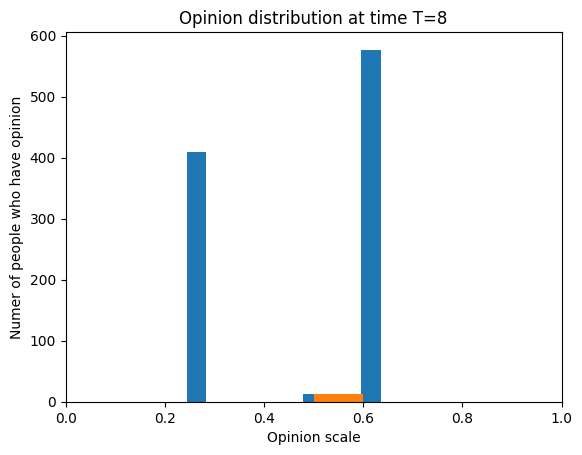

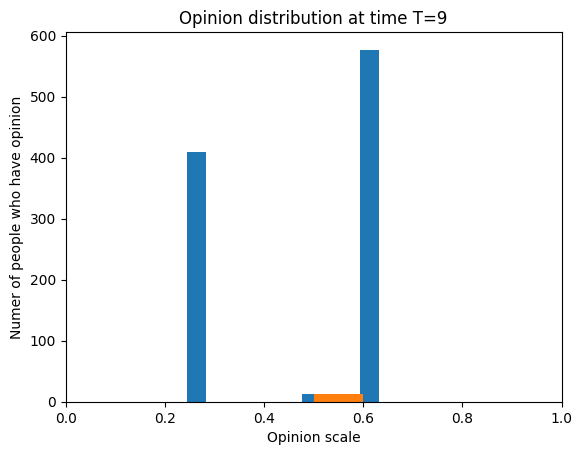

In [ ]:
#inital state variables

n = 1000 #number of agents
m = 0 # number of advertisers
R = 0.1 #opinion condfidance bound

rounds = 10

#initialize the agents
agents = np.random.uniform(0, 1, n)
agents_initial = np.copy(agents) 

advertisers = [2,5,10,12,32,45,50,61,74,88,91,93,99]
# agents[advertisers] = 0.5

#initialize array to store opinions over time
agents_history = np.zeros((rounds+1, n))
agents_history[0, :] = agents

#do t time steps (main loop)
for r in range(rounds):

    #make a temp list of agents
    agents_next = np.zeros(n)

    #loop over all agents
    for i, a in enumerate(agents):
        if i in advertisers:
            agents_next[i] = agents[i]
        else:
            agents_next[i] = one_step(a, agents)

    #update the agents list
    agents = np.copy(agents_next)
    agents_history[r+1, :] = agents


    plt.hist(agents)
    plt.hist(agents[advertisers])
    plt.xlabel('Opinion scale')
    plt.ylabel('Numer of people who have opinion')
    plt.title(f"Opinion distribution at time T={r}")
    plt.xlim(0,1)
    plt.show()


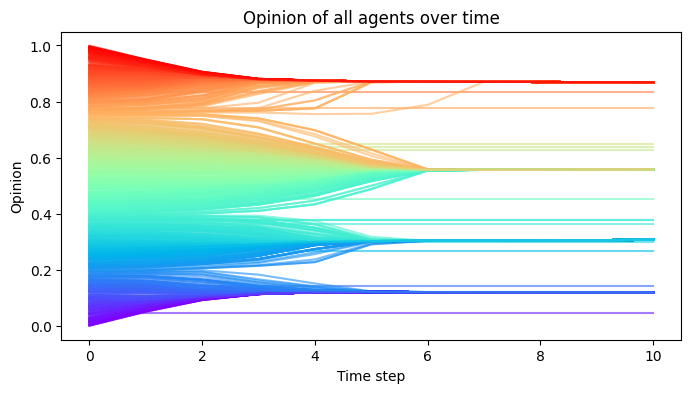

In [22]:
plot_opinions(agents_history, agents_initial, rounds, alpha=0.6)

In [42]:
#inital state variables

n = 1000 #number of agents
m = 0 # number of advertisers
R = 0.1 #opinion condfidance bound

rounds = 20

#initialize the agents
agents = np.random.uniform(0, 1, n)
agents_initial = np.copy(agents) 

advertisers = [2,5,10,12,32,45,50,61,74,88,91,93,99]
agents[advertisers] = 0.5

#initialize array to store opinions over time
agents_history = np.zeros((rounds+1, n))
agents_history[0, :] = agents

#do t time steps (main loop)
for r in range(rounds):

    #make a temp list of agents
    agents_next = np.zeros(n)

    #loop over all agents
    for i, a in enumerate(agents):
        if i in advertisers:
            # agents_next[i] = agents[i] + (one_step(a,agents) - agents[i]) / 2
            agents_next[i] = agents[i] + np.abs(one_step(a,agents) - agents[i]) / 2
            # if r % 2 == 0:
            #     if agents[i] < 1:
            #         # agents_next[i] = agents[i] + np.abs(one_step(a,agents) - agents[i]) / 2
            #         agents_next[i] = agents[i] + 0.05
            # else:
            #     agents_next[i] = agents[i]
        else:
            agents_next[i] = one_step(a, agents)

    #update the agents list
    agents = np.copy(agents_next)
    agents_history[r+1, :] = agents


    # plt.hist(agents)
    # plt.hist(agents[advertisers])
    # plt.xlabel('Opinion scale')
    # plt.ylabel('Numer of people who have opinion')
    # plt.title(f"Opinion distribution at time T={r}")
    # plt.xlim(0,1)
    # plt.show()


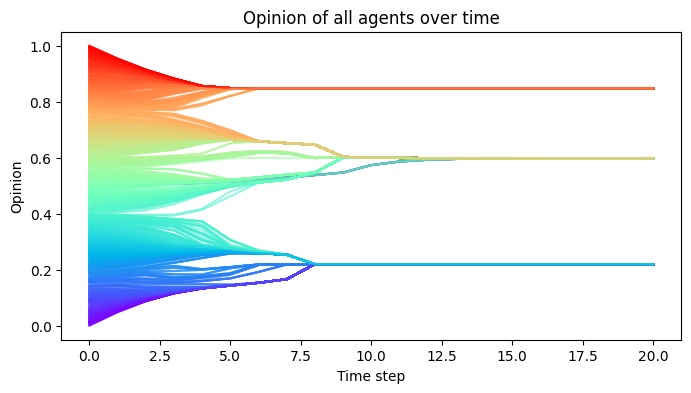

In [43]:
plot_opinions(agents_history, agents_initial, rounds, alpha=0.6)